In [5]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
%config InlineBackend.figure_formats = ['svg']
import copy
# MPL
import matplotlib
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.title_fontsize'] = 12
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['figure.dpi'] = 250
matplotlib.rcParams['figure.figsize'] = (5,5)

#colors
cmap = plt.get_cmap("viridis")
colors_b = sns.color_palette("colorblind")
colors_s = sns.color_palette("Set2")
viridis = cm.get_cmap('flare', 8)
colors = sns.color_palette("colorblind")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

/var/folders/cm/wyr4f7dd46340qyn2n3sgyzm0000gn/T/ipykernel_98436/596489878.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('flare', 8)


### Importing Data

In [6]:
file = 'SGD_GClip_160M_SP_SL2048_3Btok_BS256'
res1 = pd.read_pickle('../data/'+file+'.pkl')
res1

,optim,clip,num_steps,bs,lr,wd,beta1,ppl_train,ppl_all,ppl_test
0,sgd,1,4800,256,0.03125,0.0010,0.9500,1.373725e+02,"[45379.44644010638, 35111.12489459364, 26404.1...",135.503072
11,sgd,1,4800,256,0.03125,0.0000,0.9875,6.891298e+01,"[57634.12928272159, 17171.513193298986, 12007....",67.664644
10,sgd,1,4800,256,0.03125,0.0000,0.9750,6.626012e+01,"[57984.76381267304, 32213.788085986846, 22240....",68.806809
9,sgd,1,4800,256,0.03125,0.0000,0.9500,9.114048e+01,"[57634.12928272159, 18123.868431106337, 12887....",87.729439
7,sgd,1,4800,256,0.03125,0.0001,0.9875,6.395337e+01,"[50055.87672869846, 22663.15571518161, 16350.6...",61.603751
...,...,...,...,...,...,...,...,...,...,...
73,sgd,1,4800,256,2.00000,0.0010,0.9500,3.642042e+275,"[58502.890143221, 58330.52194352558, 53696.073...",57971.970823
72,sgd,1,4800,256,2.00000,0.0010,0.9000,6.456786e+67,"[58346.37816964917, 57599.292519722505, 57634....",57971.970823
82,sgd,1,4800,256,2.00000,0.0000,0.9750,3.488000e+03,"[58294.98627541683, 11050.618731936947, 8600.9...",3427.392345
76,sgd,1,4800,256,2.00000,0.0001,0.9000,2.073795e+02,"[23310.512043725477, 5569.592929745134, 4575.4...",196.925237


In [7]:
print(len(res1))

84


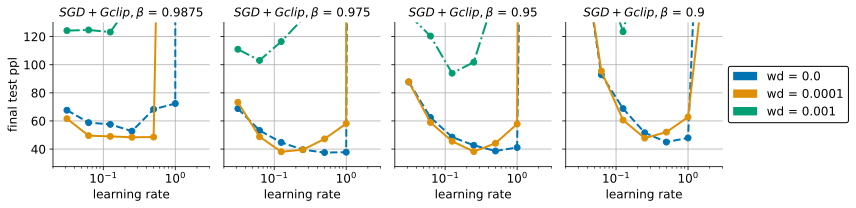

In [9]:

# Create subplots
beta1s = [0.9875, 0.975, 0.95, 0.9]
wds = [0.0, 0.0001, 0.001]

style = ['--','-','-.']
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
dd = []
for i, beta1 in enumerate(beta1s):
    ax = axes[i]
    for w, wd in enumerate(wds):
        lrs_plt = np.array(res1[(res1['beta1'] == beta1) & (res1['wd'] == wd) & (res1['clip'] == 1.0)]['lr'])
        data = np.array(res1[(res1['beta1'] == beta1) & (res1['wd'] == wd) & (res1['clip'] == 1.0)]['ppl_test'])
        dd.append(copy.deepcopy(data))
        #print(data)
        ax.plot(lrs_plt, data, marker='o', linestyle=style[w])
        ax.set_xscale('log')
        ax.set_ylim([27.5, 130.1])
        ax.set_xlim([0.02, 3.0])
        ax.grid()
        if beta1==beta1s[-1]:
            legend_elements = [Patch(facecolor=colors[ww], label=r'wd = '+str(wds[ww]))for ww in range(len(wds))]
            ax.legend(handles=legend_elements, framealpha=1, facecolor='white', edgecolor='black',loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_title(r'$SGD+Gclip, \beta$ = '+str(beta1))
        #ax.set_xticks(lrs)
        #ax.set_xticklabels([f"{num:.1e}" for num in lrs])
        ax.set_xlabel('learning rate')
        if i == 0:
            ax.set_ylabel('final test ppl')

plt.tight_layout()
#plt.savefig('sm3.pdf', format="pdf", bbox_inches="tight")

#plt.savefig('betas_160M_SGD_Gclip.pdf', format="pdf", bbox_inches="tight")
#print(np.min(np.array(dd)))